# Module 3 R Exercise

In these exercises, we will use ggplot2 functions to plot some statistical plots about a data set. Have your ggplot2 cheat sheets and documentation handy to find the right parameters for the functions. 

Let's read the house sales data.

In [1]:
library(ggplot2)

County_data = read.csv("/dsa/data/all_datasets/house_sales_in_king_county/kc_house_data.csv",header=TRUE,sep=",")
head(County_data)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
<dbl>,<fct>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


There are two rows in the dataset with number of bedrooms greater than 10, but the price is very low. Let's remove those outliers from the data. 

In [2]:
County_data=County_data[!County_data$bedrooms>10,]

**Exercise 1:** Run str and summmary commands on the data set and give your best guess about which atrributes are **nominal** variables. **Justify your answer.** 

In [3]:
# <-- YOUR ANSWER HERE -->
str(County_data)
summary(County_data)

'data.frame':	21611 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovat

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140626T000000:  131   1st Qu.: 321725   1st Qu.: 3.000  
 Median :3.905e+09   20140625T000000:  130   Median : 450000   Median : 3.000  
 Mean   :4.581e+09   20140708T000000:  127   Mean   : 540084   Mean   : 3.369  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :10.000  
                     (Other)        :20832                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1426   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7620   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15108   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

**Exercise 2:** Map the **sqft_living** and **price** attributes to x and y axes of a scatter plot, respectively.

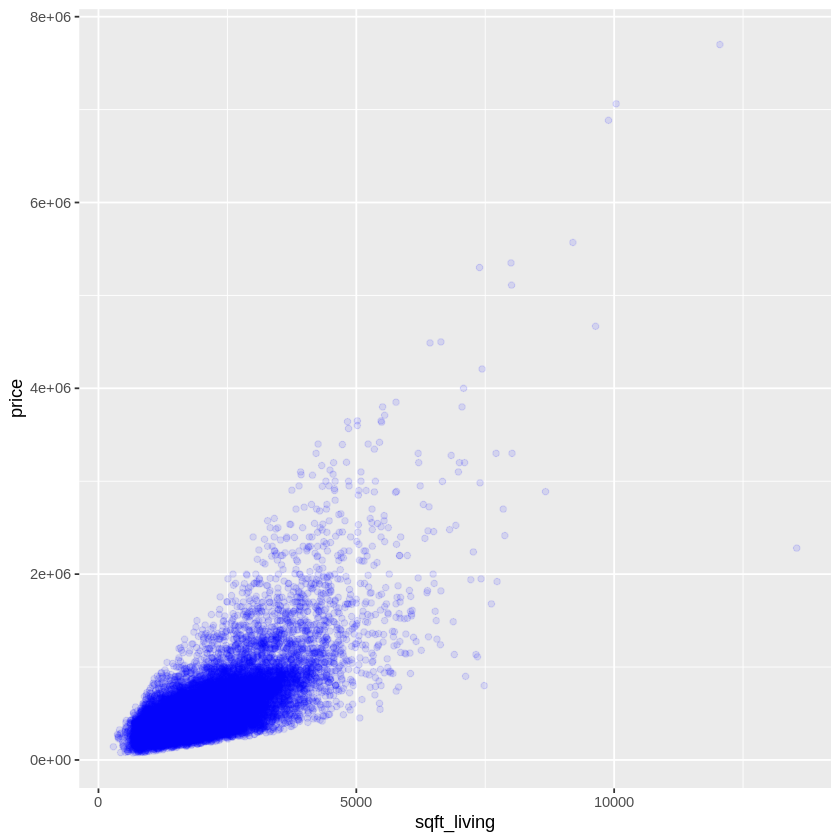

In [4]:
p <- ggplot(County_data, aes(x=sqft_living, y=price)) + geom_point(alpha=0.1, color="blue")
p

We can't really see anything here, let's try the same plot with log scales. 

**Exercise 3:** Plot the above axes (both x and y) in log10 scale. 

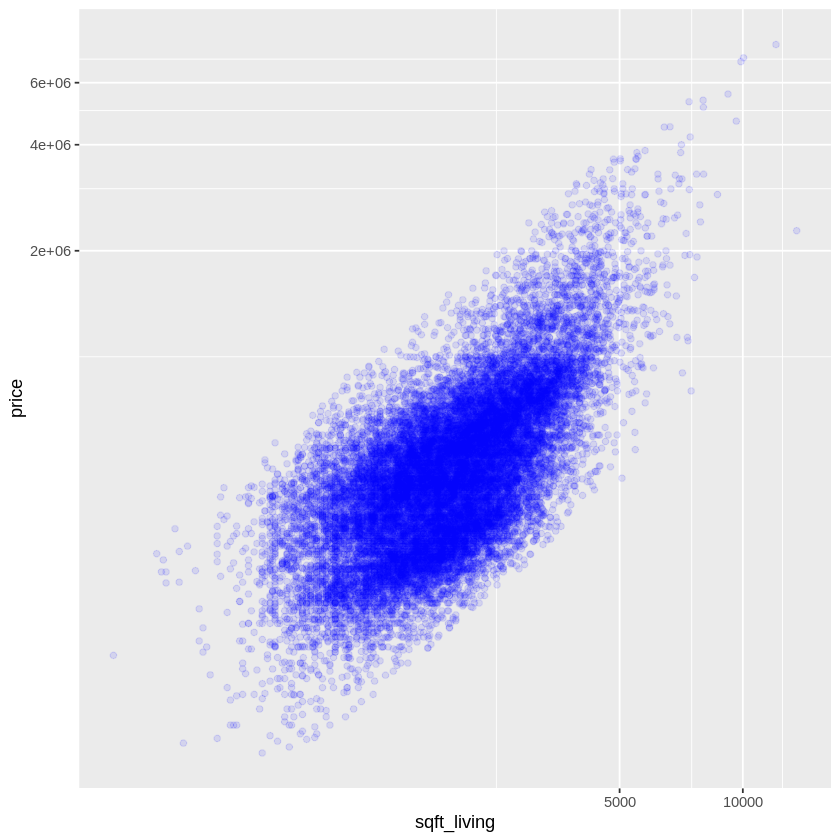

In [5]:
p + coord_trans(x="log10", y="log10")

This gives a better relation between price and square footage. Let's plot a histogram of price. That is the distribution of prices for all houses. 

**Exercise 4:** Plot a **histogram** of **price** with a **binwidth** of 30000.

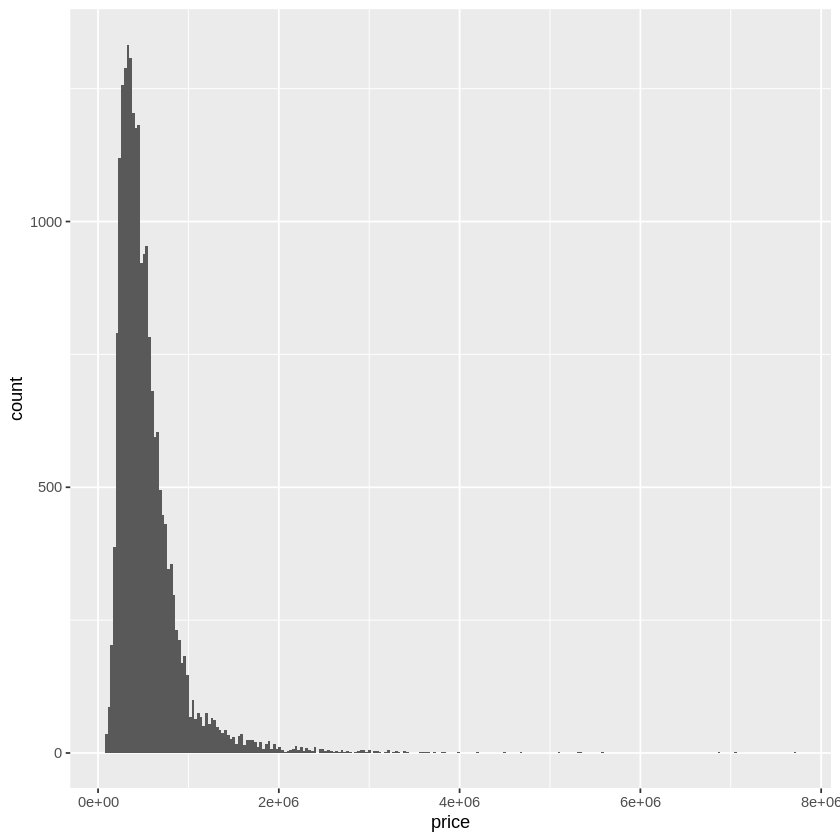

In [6]:
(g <- ggplot(County_data, aes(x=price)) + geom_histogram(binwidth=30000))


We can also plot the probability density function of the price, it will look like a smoothed version of the histogram.

**Exercise 5:** Plot the density of **price** using **geom_density**. 

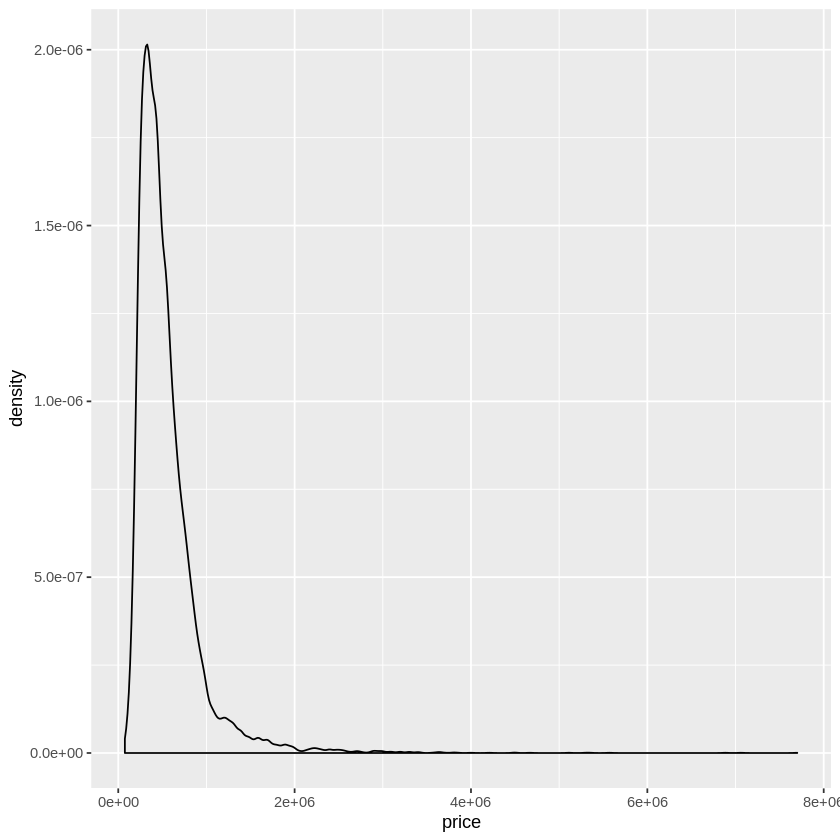

In [7]:
ggplot(County_data, aes(x=price)) + geom_density()

Let's work on the subset of the data; we will look only at houses that are less than $2M. 

In [8]:
lowprice_houses = County_data[County_data$price<2000000,]

We can plot multiple densities on the same plot to see how the price distribution differs with respect to some attribute. We should use alpha transparency in geom_density to see different distributions.

**Exercise 6:** Plot multiple densities of **price** with respect to **number of bedrooms**. 

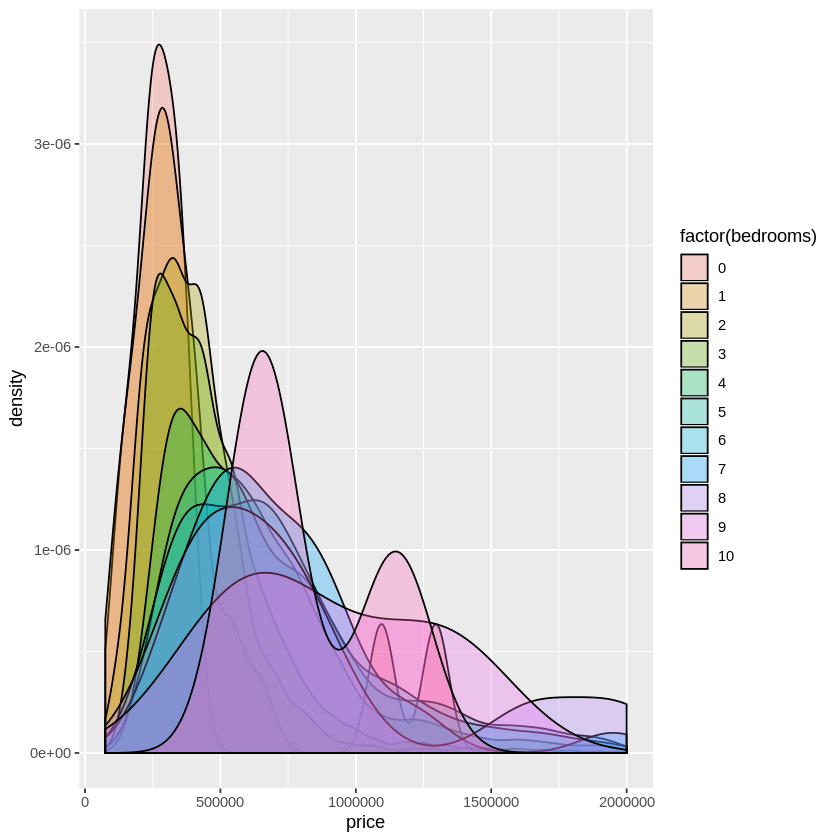

In [9]:
ggplot(lowprice_houses , aes(x=price, fill=factor(bedrooms))) + geom_density(alpha=0.3)

This works well if there aren't too many classes; here we can't see much so let's use the **facet_wrap()** to create *small multiples* to compare densities for different number of bedrooms. 

**Exercise 7:** Plot **small multiples** of **price densities** with respect to **number of bedrooms**. 

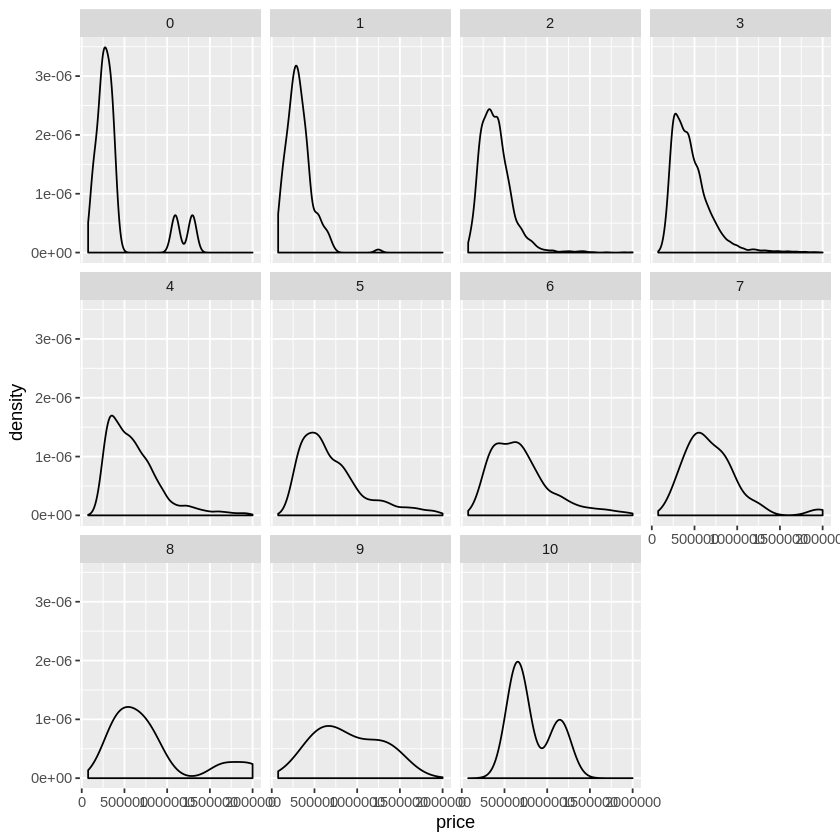

In [10]:
ggplot(lowprice_houses , aes(x=price,)) + geom_density() + facet_wrap(vars(bedrooms))

Here we can see that up to four bedrooms, the price distribution is narrow; after that the variance of the price increases. 
Let's see the distribution for number of floors.

**Exercise 8:** Plot **small multiples** of **price densities** with respect to **number of floors**. 

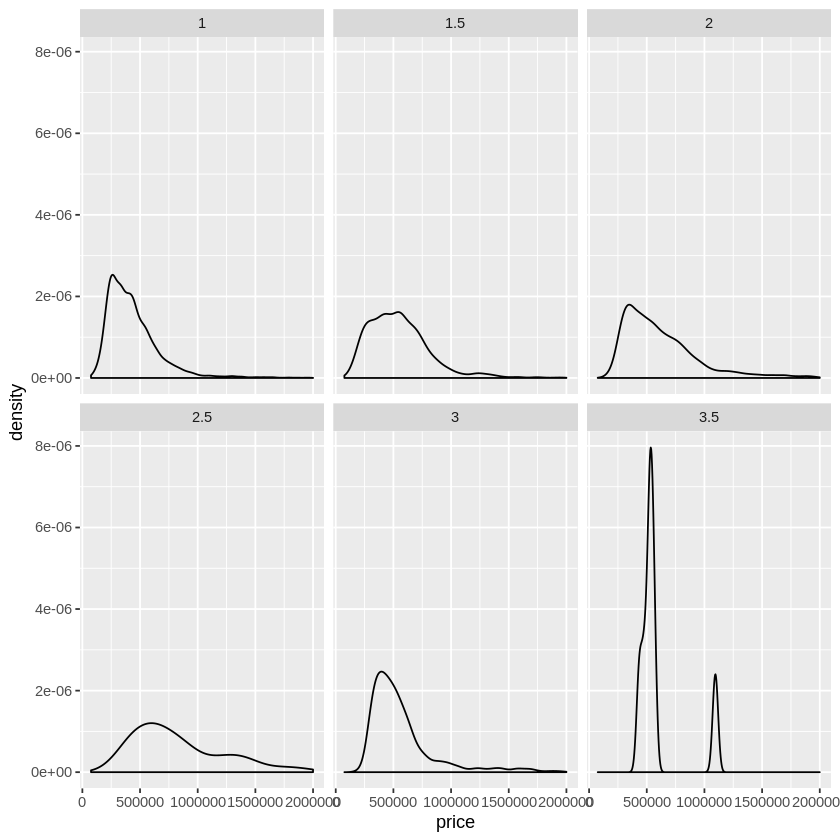

In [11]:
ggplot(lowprice_houses , aes(x=price,)) + geom_density() +  facet_wrap(vars(floors))

Let's plot a scatter plot for price vs. square footage using small multiples for number of bedrooms. Map the number of floors to *color* visual variable using a **sequential** brewer palette.

**Exercise 9:** Do a scatter plot of **price** vs. **square footage** with **small multiples** of **bedrooms**. 

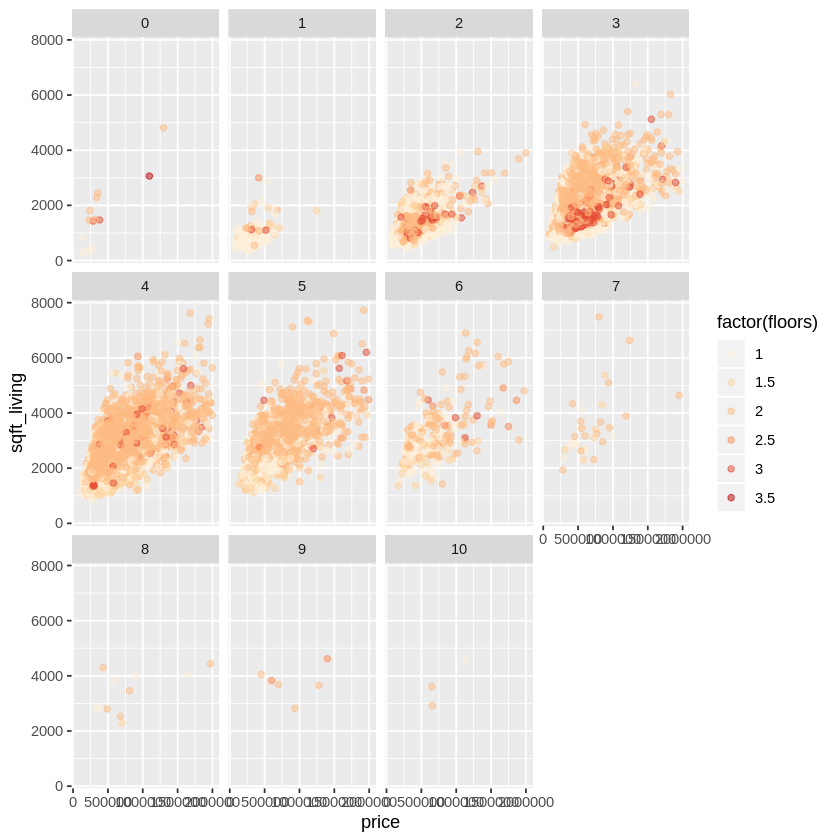

In [12]:
g <- ggplot(lowprice_houses, aes(x=price, y=sqft_living, color=factor(floors))) + geom_point(alpha=0.5) 
g <- g + facet_wrap(vars(bedrooms)) + scale_color_brewer(type='seq', palette = 8)
g

**Exercise 10:** Let's make the axes log scale. 

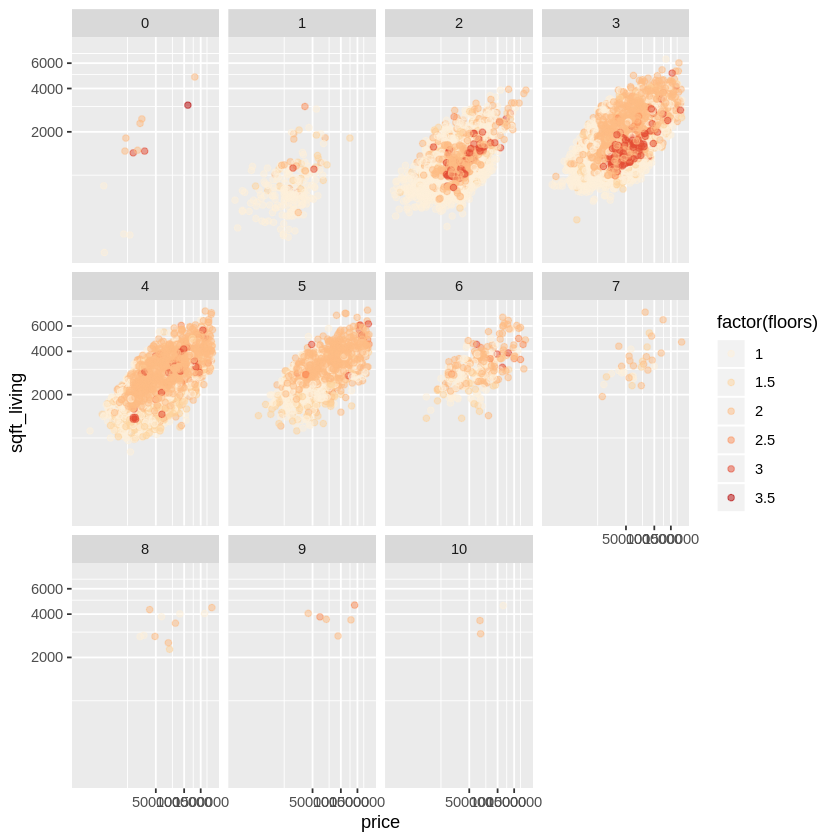

In [13]:
g <- g + coord_trans(x="log10", y="log10")
g

**Let's look at a different data set. This one is about a survey of students enrolled in a class, and some information about them was collected about their behavior, demographics, etc.** 

In [14]:
ecg = read.csv("/dsa/data/all_datasets/eyecolorgender/eyecolorgenderdata.csv",header=TRUE,sep=",")
head(ecg)

gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<dbl>
female,18,first,hazel,68,195,0,1,20,Yes,3,75,6,18
male,20,third,brown,70,120,3,0,24,No,0,50,0,3
female,18,first,green,67,200,0,1,35,Yes,3,53,8,1
male,23,fourth,hazel,74,140,1,1,5,Yes,25,50,0,7
female,19,second,blue,62,60,0,1,5,Yes,4,30,2,5
male,19,second,green,67,0,0,1,5,Yes,8,100,0,10


**Exercise 11:** Name the **nominal** and **ordinal** variables in this data set. 

In [15]:
# The nominal variables are gender, eyecolor, and exercise
# The only ordinal variable is year

**Exercise 12:** Plot a scatter plot of **gender** vs. **eyecolor**.

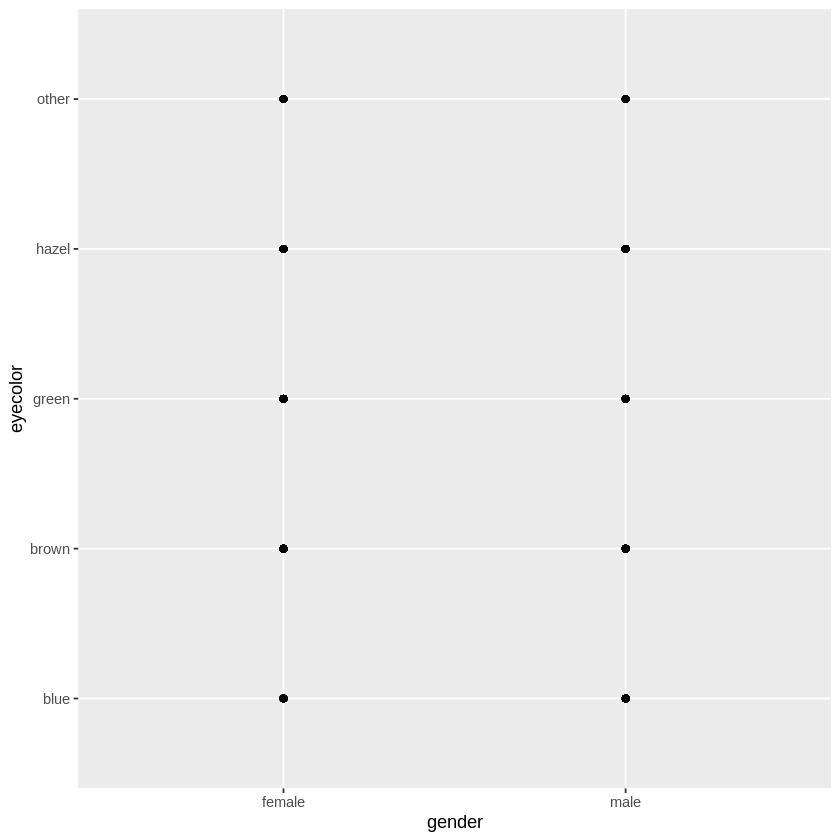

In [16]:
(e <- ggplot(ecg, aes(x=gender, y=eyecolor)) +  geom_point())

This didn't work well. When we have overplotting problem where attributes have same exact values for a large number of data rows, we should use geom_jitter() to randomly place points in a scatter plot.

**Exercise 13:** Plot a scatter plot of **gender** vs. **eyecolor** with **jitter** geometry. 

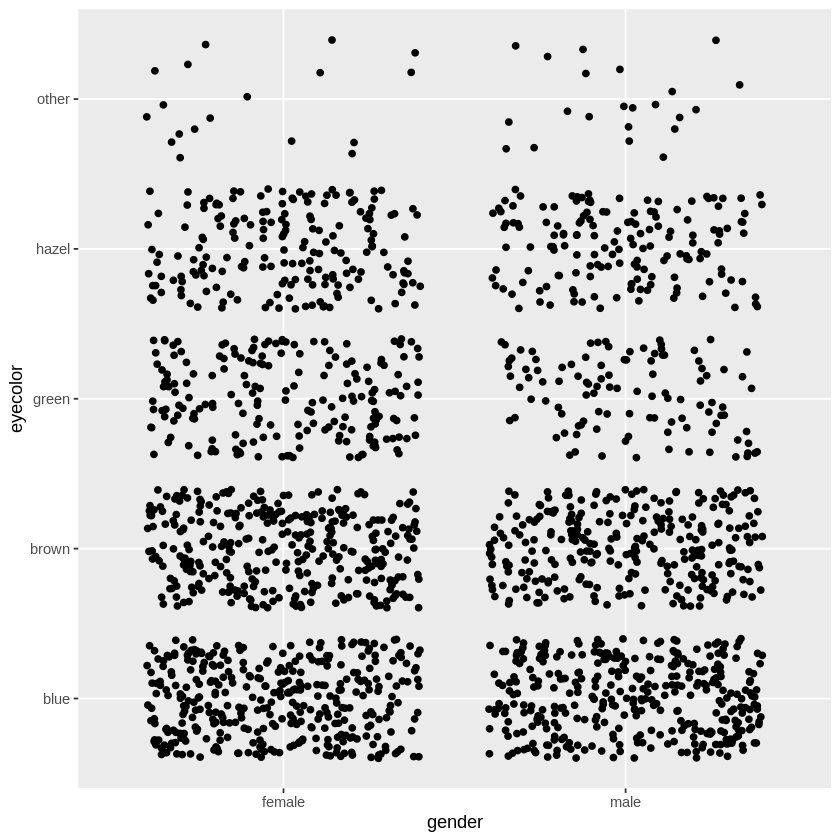

In [17]:
(e <- ggplot(ecg, aes(x=gender, y=eyecolor)) + geom_jitter() )

It's intuitive to use **color** visual variable for the **eyecolor** attribute.

**Exercise 14:** Plot a scatter plot of **gender** vs. **eyecolor** and use **color** for the **eyecolor** attribute. Adjust width and height of **jitter** suitably and add transparency. 

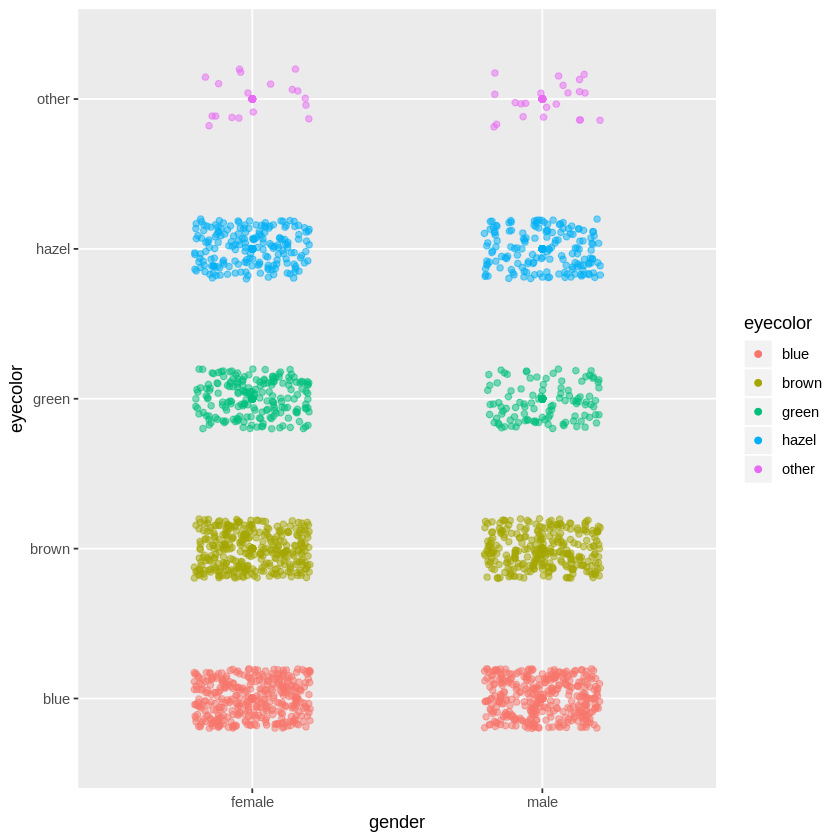

In [19]:
(e <- ggplot(ecg, aes(x=gender, y=eyecolor, color=eyecolor)) + geom_point() + geom_jitter(width=0.2, height=0.2, alpha=0.5))

The colors should be intuitive, so we will manually name them with **scale_color_manual()** where the color values will be 
c("blue", "chocolate4", "green4", "#595c26", "black").

**Exercise 15:** Add manual colors to the above plot.

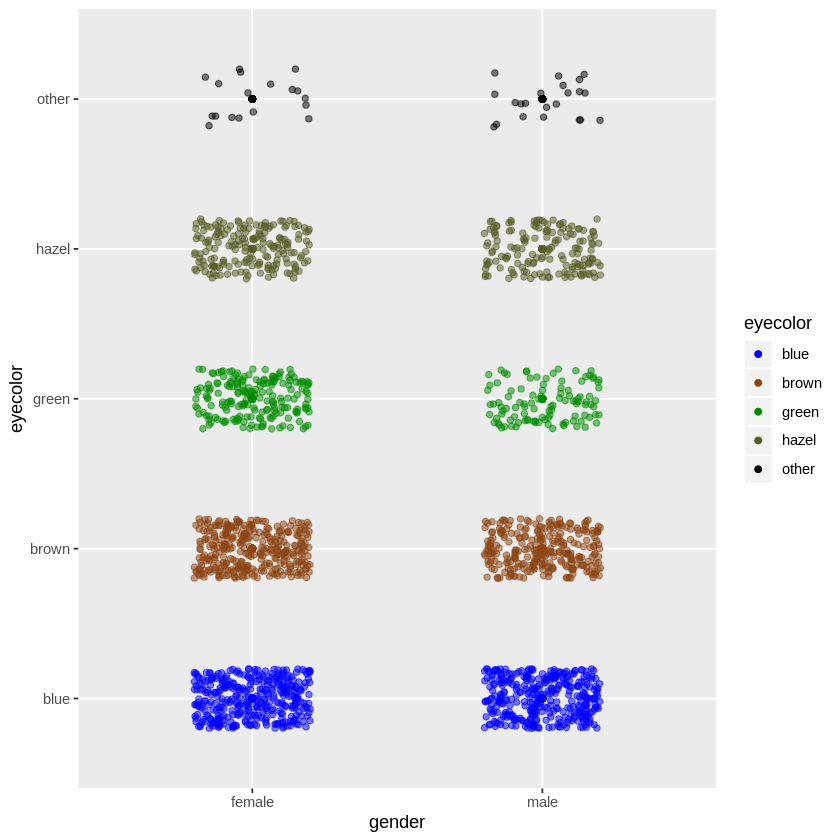

In [20]:
e <- e + scale_color_manual(values = c('blue', 'chocolate4', 'green4', '#595c26', 'black'))
e

**Exercise 16:** And finally add **shape** visual variable to encode the **exercise** attribute. **Does it work well? Why?** 


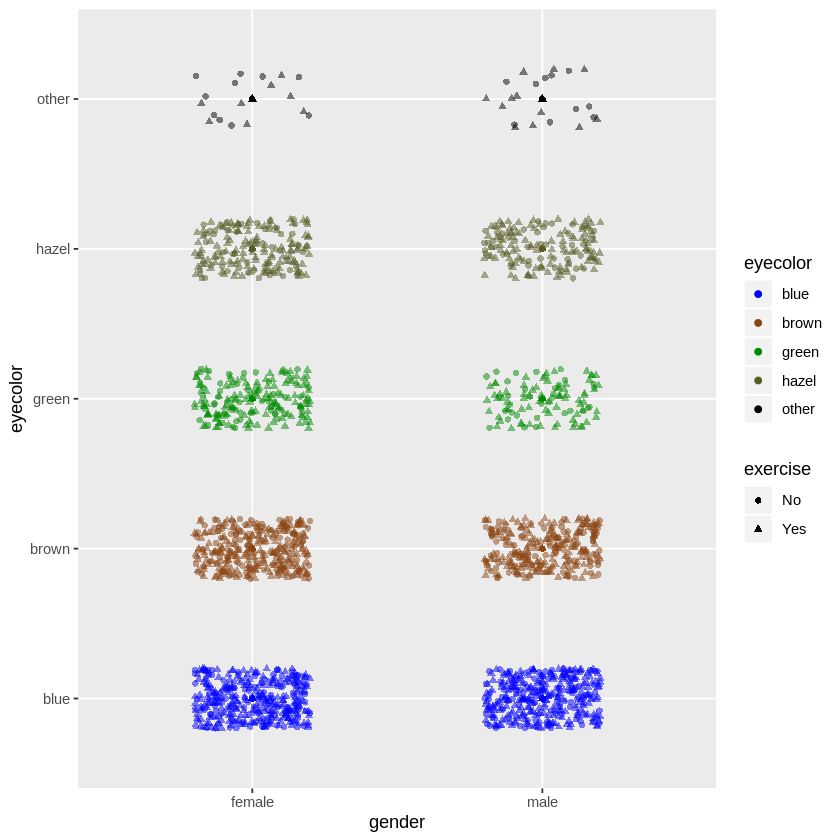

In [22]:
e <- ggplot(ecg, aes(x=gender, y=eyecolor, color=eyecolor, shape=exercise)) + geom_point() + geom_jitter(width=0.2, height=0.2, alpha=0.5)
e <- e + scale_color_manual(values = c('blue', 'chocolate4', 'green4', '#595c26', 'black'))
e

**Exercise 17:** Plot a scatter plot of **gender** vs. **height** with **small multiples** for **exercise**. 

**Use the techniques you applied in the above exercises. Use intuitive visual variables for the attributes.** 


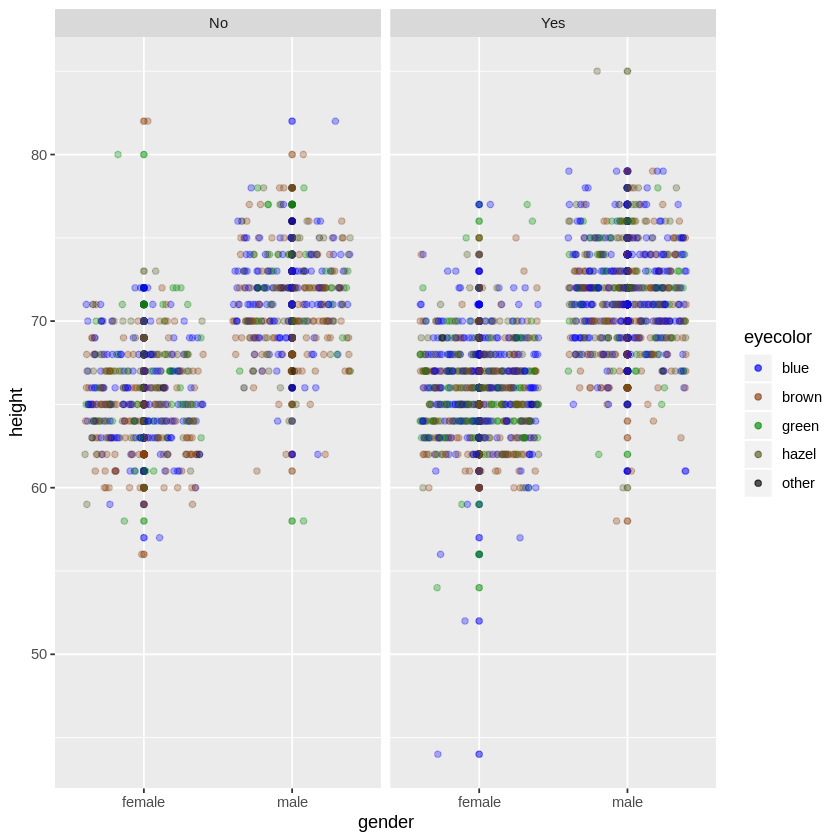

In [28]:
e <- ggplot(ecg, aes(x=gender, y=height, color=eyecolor)) + geom_point(alpha=0.5) + geom_jitter(height=0, width=0.4, alpha=0.3)
e <- e + scale_color_manual(values = c('blue', 'chocolate4', 'green4', '#595c26', 'black')) + facet_wrap(vars(exercise))
e